In [1]:
import pandas as pd

# Load data from a CSV file
df = pd.read_csv('zomato.csv')

# Display first 5 rows
df.head()


,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


In [7]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [13]:
df['rate (out of 5)'] = df['rate (out of 5)'].fillna(df['rate (out of 5)'].mode()[0])
df['avg cost (two people)'] = df['avg cost (two people)'].fillna(df['avg cost (two people)'].median())

In [15]:
print(df.isnull().sum())

Unnamed: 0.1             0
Unnamed: 0               0
restaurant name          0
restaurant type          0
rate (out of 5)          0
num of ratings           0
avg cost (two people)    0
online_order             0
table booking            0
cuisines type            0
area                     0
local address            0
dtype: int64


In [17]:
df.duplicated().sum()

0

In [19]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [21]:
df['online_order'] = df['online_order'].str.lower().str.strip()
df['table booking'] = df['table booking'].str.lower().str.strip()
df['restaurant type'] = df['restaurant type'].str.lower().str.strip()
df['cuisines type'] = df['cuisines type'].str.lower().str.strip()

In [23]:
df = df[(df['rate (out of 5)'] >= 0) & (df['rate (out of 5)'] <= 5)]

In [25]:
df = df[df['avg cost (two people)'] > 0]

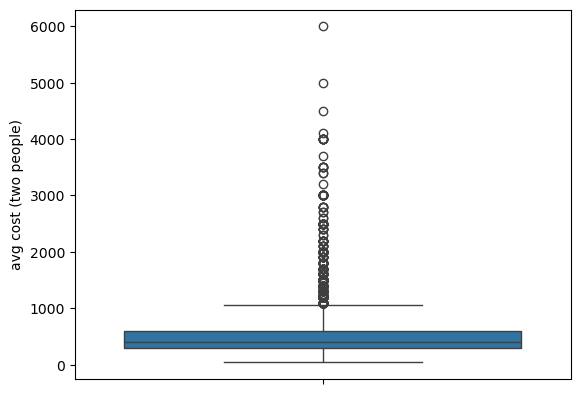

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['avg cost (two people)'])
plt.show()

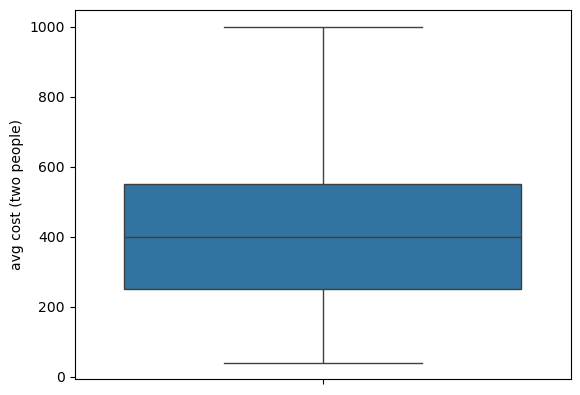

In [31]:
Q1 = df['avg cost (two people)'].quantile(0.25)
Q3 = df['avg cost (two people)'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

df = df[(df['avg cost (two people)'] >= lower_limit) & (df['avg cost (two people)'] <= upper_limit)]
sns.boxplot(df['avg cost (two people)'])
plt.show()

In [33]:
print(df.describe(include=['object']))

       restaurant name restaurant type online_order table booking  \
count             6443            6443         6443          6443   
unique            6443              64            2             2   
top       #FeelTheROLL     quick bites          yes            no   
freq                 1            2840         3532          6136   

                cuisines type                            area local address  
count                    6443                            6443          6443  
unique                   1820                              30            89  
top     north indian, chinese  Byresandra,Tavarekere,Madiwala           BTM  
freq                      411                             744           452  


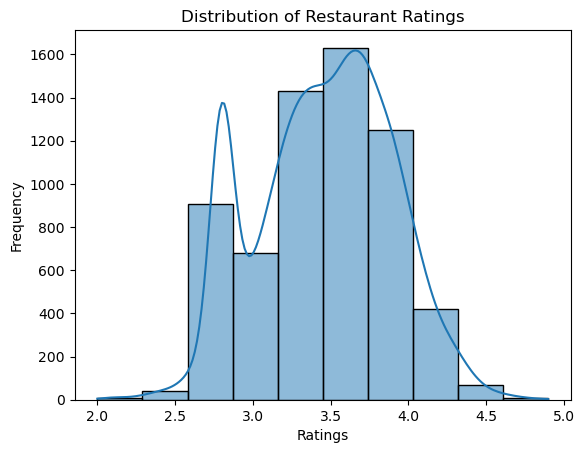

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['rate (out of 5)'], bins=10, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

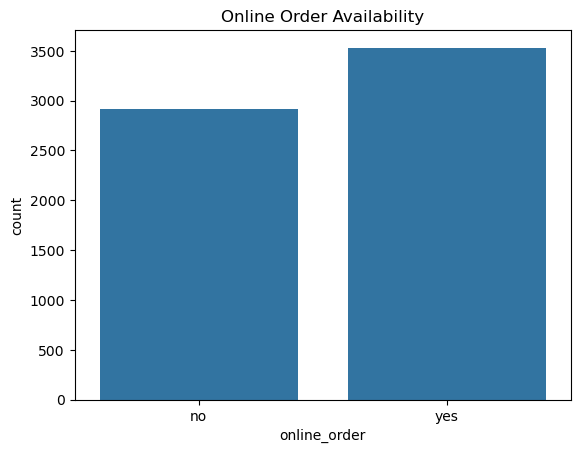

In [37]:
sns.countplot(x=df['online_order'])
plt.title("Online Order Availability")
plt.show()

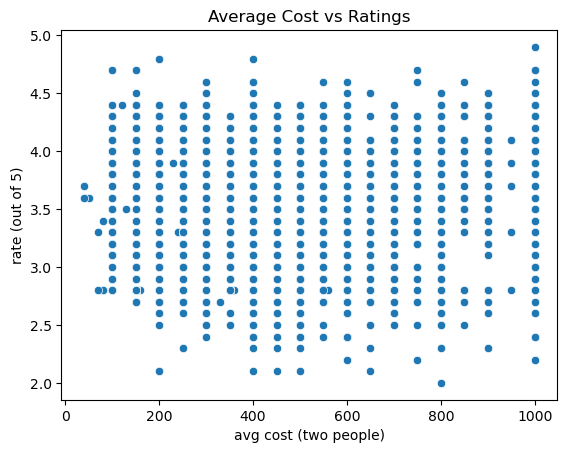

In [39]:
sns.scatterplot(x=df['avg cost (two people)'], y=df['rate (out of 5)'])
plt.title("Average Cost vs Ratings")
plt.show()

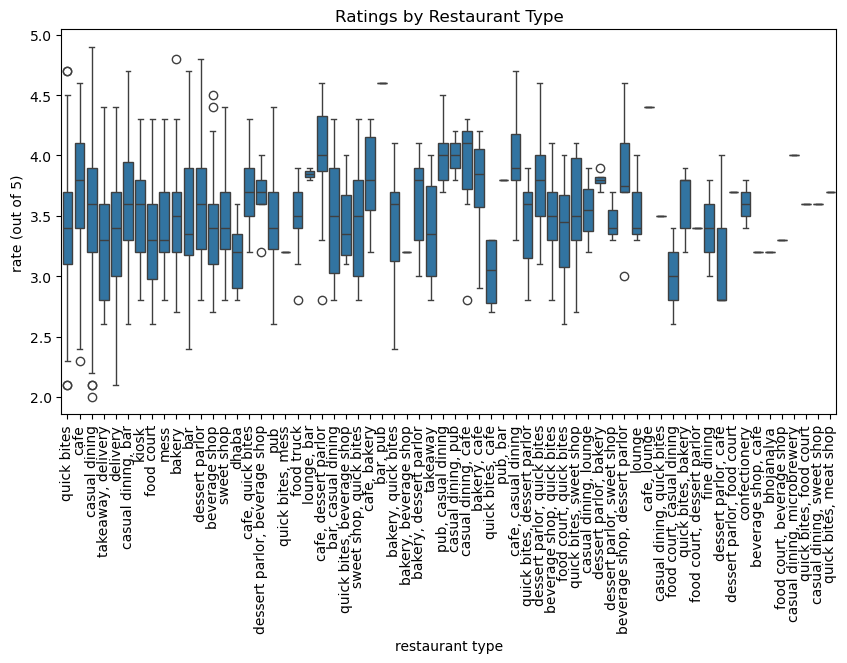

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x='restaurant type', y='rate (out of 5)', data=df)
plt.xticks(rotation=90)
plt.title("Ratings by Restaurant Type")
plt.show()

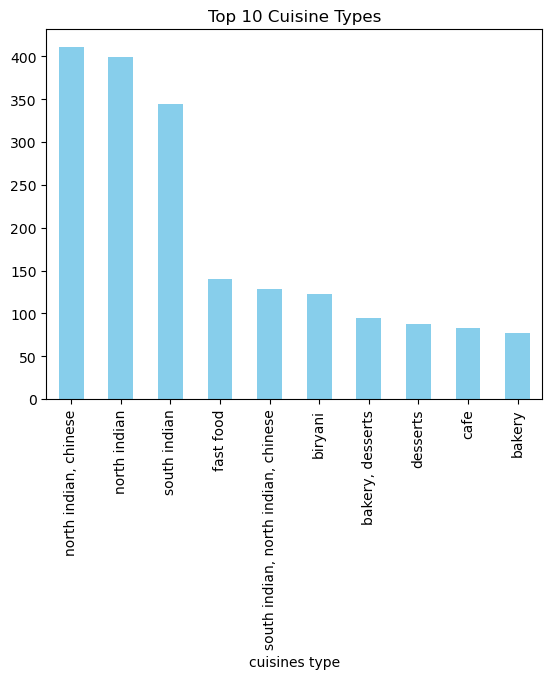

In [47]:
top_cuisines = df['cuisines type'].value_counts().head(10)
top_cuisines.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cuisine Types")
plt.show()

In [1]:
import pandas as pd

# Load the dataset again
df = pd.read_csv("zomato.csv")  # Update with the correct path if needed

# Check if data is loaded
df.head()
df_cleaned = df  # If you cleaned another dataframe, reassign it
df_cleaned.to_csv("cleaned_zomato.csv", index=False)

In [3]:
import os
print("cleaned_zomato.csv" in os.listdir()) 

True


In [5]:
df_check = pd.read_csv("cleaned_zomato.csv")
df_check.isnull().sum()  # Check for missing values
df_check.duplicated().sum()  # Check for duplicates

0

In [7]:
df.to_csv(r"C:\Users\Milon\Desktop\cleaned_zomato.csv", index=False)

In [9]:
import os
print(os.path.exists(r"C:\Users\Milon\Desktop\cleaned_zomato.csv"))

True


In [11]:
df[df['rate (out of 5)'] > 5]  # Ratings above 5 are incorrect

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address


In [13]:
df['rate (out of 5)'] = df['rate (out of 5)'].apply(lambda x: min(x, 5))


In [15]:
df['restaurant type'] = df['restaurant type'].str.strip().str.lower()

In [17]:
df = pd.get_dummies(df, columns=['restaurant type', 'area'])

In [19]:
df['churn'] = df.apply(lambda x: 1 if (x['rate (out of 5)'] < 3 and x['num of ratings'] < 50) else 0, axis=1)

In [21]:
features = ['avg cost (two people)', 'rate (out of 5)', 'num of ratings', 'online_order', 'table booking']
X = df[features]
y = df['churn']

In [23]:
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['table booking'] = df['table booking'].map({'Yes': 1, 'No': 0})

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(X_train.isnull().sum())  # Check missing values in X_train
print(y_train.isnull().sum())  # Check missing values in y_train

avg cost (two people)    42
rate (out of 5)          51
num of ratings            0
online_order              0
table booking             0
dtype: int64
0


In [35]:
print(X_train.dtypes)

avg cost (two people)    float64
rate (out of 5)          float64
num of ratings             int64
online_order              object
table booking             object
dtype: object


In [37]:
X_train = pd.get_dummies(X_train, drop_first=True)  # Convert categorical columns to binary
X_test = pd.get_dummies(X_test, drop_first=True)

In [41]:
print(X_train.columns)
print(X_test.columns)

Index(['avg cost (two people)', 'rate (out of 5)', 'num of ratings',
       'online_order_Yes', 'table booking_Yes'],
      dtype='object')
Index(['avg cost (two people)', 'rate (out of 5)', 'num of ratings',
       'online_order_Yes', 'table booking_Yes'],
      dtype='object')


In [43]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index([], dtype='object')


In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col].astype(str))  # Convert to string to avoid errors
    X_test[col] = le.transform(X_test[col].astype(str))

In [47]:
for col in categorical_cols:
    if col in X_test.columns:  
        X_test[col] = le.transform(X_test[col].astype(str))  
    else:  
        X_test[col] = 0  # Assign default value if missing

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 🔹 Load the dataset (Modify this if your file name is different)
df = pd.read_csv("zomato.csv")

# 🔹 Define features and target variable
features = ["avg cost (two people)", "rate (out of 5)", "num of ratings", "online_order", "table booking"]
df["online_order"] = df["online_order"].map({"Yes": 1, "No": 0})
df["table booking"] = df["table booking"].map({"Yes": 1, "No": 0})
df["churn"] = df.apply(lambda x: 1 if (x["rate (out of 5)"] < 3 and x["num of ratings"] < 50) else 0, axis=1)

X = df[features]
y = df["churn"]

# 🔹 Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardize features (Fix for feature names issue)
scaler = StandardScaler()
X_train_np = X_train.to_numpy()  # Convert to NumPy before fitting
scaler.fit(X_train_np)

# 🔹 Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_np, y_train)

# 🔹 Save the model & scaler
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!


In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00       169

    accuracy                           1.00      1421
   macro avg       1.00      1.00      1.00      1421
weighted avg       1.00      1.00      1.00      1421



In [55]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Ensure it is fitted
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [67]:
import streamlit as st
import pandas as pd
import pickle
import numpy as np

# 🔹 Load trained model and scaler
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

# 🔹 Streamlit UI
st.title("🍽️ Zomato Restaurant Churn Prediction")
st.write("Enter restaurant details to predict if the restaurant is likely to churn or survive.")

# 🔹 User inputs
avg_cost = st.number_input("Average Cost for Two People (₹)", min_value=50, max_value=5000, step=50)
rating = st.slider("Restaurant Rating (Out of 5)", 0.0, 5.0, step=0.1)
num_ratings = st.number_input("Number of Ratings", min_value=0, max_value=10000, step=10)
online_order = st.radio("Online Order Available?", ["Yes", "No"])
table_booking = st.radio("Table Booking Available?", ["Yes", "No"])

# 🔹 Convert categorical inputs
online_order = 1 if online_order == "Yes" else 0
table_booking = 1 if table_booking == "Yes" else 0

# 🔹 Prepare input for model
feature_names = ["avg cost (two people)", "rate (out of 5)", "num of ratings", "online_order", "table booking"]
input_data = pd.DataFrame([[avg_cost, rating, num_ratings, online_order, table_booking]], columns=feature_names)

# 🔹 Convert to NumPy array (Fix for StandardScaler feature name warning)
input_data_np = input_data.to_numpy()

# 🔹 Scale the input
input_data_scaled = scaler.transform(input_data_np)

# 🔹 Predict
if st.button("Predict Churn"):
    prediction = model.predict(input_data_scaled)
    result = "🚨 Churn Likely" if prediction[0] == 1 else "✅ Restaurant is Stable"
    st.subheader(result)

In [69]:
python train_model.py

SyntaxError: invalid syntax (192866005.py, line 1)